# Global Data Trends

This notebook will investigate periodic trends in Covid-19 case and death data, taken from the [John Hopkins Database](https://coronavirus.jhu.edu/about).

In [1]:
import os
import re
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '17'

from analysis import generate_all_df, rel_reporting_calc, generate_pca_array, generate_pca_df ,test_normalisation, run_pca

In [2]:
# Import/Generate Data
input_dir = "../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"
output_dir = "../data/country_data/"

# generate_all_df(input_dir, output_dir, overwrite_files=False)
pca_array = generate_pca_array(output_dir, 'Cases')
test_normalisation(pca_array, rtol=0.05)
pca_output = run_pca(np.transpose(pca_array), n_components=2)
print(pca_output.round(2))

There were 13 rows out of tolerance.
Explained variation per principal component: [0.35611786 0.31409958]
       PC1    PC2
Mon   9.03  15.32
Tue  -4.69   5.12
Wed  -9.01   0.58
Thu  -7.69  -1.33
Fri  -6.41  -2.76
Sat   5.66 -11.38
Sun  13.10  -5.55


In [3]:
cases_df = generate_pca_df(output_dir, 'Cases')
# cases_df.to_csv("../data/country_trends_cases.csv")

In [4]:
cases_df.iloc[:, 1:] = cases_df.iloc[:, 1:].apply(pd.to_numeric)

output_df = cases_df.copy()
output_df['PC1_Score'] = cases_df.iloc[:, 1:].dot(pca_output['PC1'].values)
output_df['PC2_Score'] = cases_df.iloc[:, 1:].dot(pca_output['PC2'].values)

output_df = output_df.sort_values(by='PC2_Score', ascending=False)
print(output_df)

              Country       Mon       Tue       Wed       Thu       Fri  \
0            Botswana  2.643910  0.687993  0.279091  2.552347  0.330832   
0          Antarctica  0.000000  7.000000  0.000000  0.000000  0.000000   
0             HolySee  1.555556  1.909091  0.777778  1.037037  0.000000   
0               Spain  1.912254  1.286475  1.046507  1.113120  1.444979   
0         Switzerland  1.730330  1.630487  1.145051  1.052108  1.030059   
..                ...       ...       ...       ...       ...       ...   
0           Guatemala  0.339776  1.259366  1.322323  1.327551  1.289055   
0   TrinidadandTobago  0.571773  1.004683  1.075724  1.156875  1.098896   
0             Croatia  0.321535  0.893817  1.446156  1.305909  1.210234   
0          Madagascar  0.554636  0.687804  0.594685  0.608973  0.553348   
0          KoreaNorth  0.000000  0.000000  0.000000  0.000000  0.000000   

         Sat       Sun  PC1_Score  PC2_Score  
0   0.038889  0.213786  -0.580258  38.248407  
0   0

Antarctica excluded with trend ['0.00', '7.00', '0.00', '0.00', '0.00', '0.00', '0.00']
Benin excluded with trend ['0.61', '0.83', '3.34', '0.86', '0.56', '0.15', '0.35']
Botswana excluded with trend ['2.64', '0.69', '0.28', '2.55', '0.33', '0.04', '0.21']
KoreaNorth excluded with trend ['0.00', '0.00', '0.00', '0.00', '0.00', '7.00', '0.00']
Nicaragua excluded with trend ['0.12', '0.06', '6.21', '0.48', '0.03', '0.06', '0.00']
Oman excluded with trend ['1.05', '1.07', '1.14', '0.98', '0.22', '0.20', '2.35']
Palau excluded with trend ['0.91', '2.04', '0.99', '0.59', '1.90', '0.28', '0.58']
SummerOlympics2020 excluded with trend ['1.81', '0.49', '0.52', '2.10', '0.53', '1.07', '0.18']
Sweden excluded with trend ['0.35', '2.35', '1.19', '2.00', '1.01', '0.17', '0.14']
Tanzania excluded with trend ['0.78', '1.93', '2.35', '0.74', '0.58', '0.02', '0.25']


C:\Users\galla\AppData\Local\Temp\ipykernel_4304\2909350831.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);


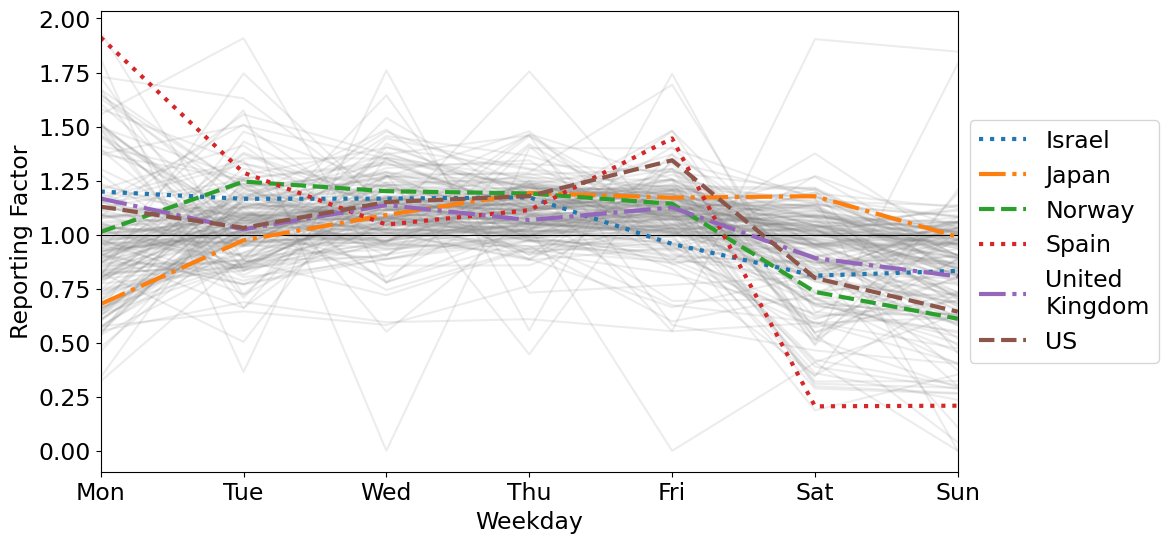

In [5]:
named_countries = [ 'Israel', 'Japan', 'Norway', 'Spain', 'UnitedKingdom', 'US']
linestyles = [':', '-.', '--']

fig, ax = plt.subplots(1, figsize=(12, 6))

for i, row in cases_df.iterrows():
    if max(row[1:] > 2):  # Option to exlcude countries with extreme trends 
        print(f"{row[0]} excluded with trend {['%.2f' % x for x in row[1:].values]}")
        continue
    if row[0] in named_countries:
        j = named_countries.index(row[0])
        name = label = re.sub(r'((?<=[a-z])[A-Z]|(?<!\A)[A-Z](?=[a-z]))', r' \n\1', row[0])
        plt.plot(range(7), row.values[1:], label = name, linewidth=3, zorder=2, linestyle=linestyles[j%3])
    else:
        plt.plot(range(7), row.values[1:], alpha=0.15, linewidth=1.5, color='gray', zorder=0)

ax.hlines(1, 0, 6, linestyle = '-', linewidth = 0.8, color='k', zorder = 1)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);
plt.xlim(0, 6); plt.xlabel('Weekday'); plt.ylabel("Reporting Factor")

box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(''); plt.tight_layout()
# plt.savefig(f"../images/data_trends/global_cases_trends.pdf")

In [6]:
deaths_df = generate_pca_df(output_dir, 'Deaths')
deaths_df.to_csv("../data/country_trends_deaths.csv")

Benin excluded with trend ['0.91', '0.89', '2.88', '0.72', '0.66', '0.27', '0.36']
Bhutan excluded with trend ['0.00', '0.60', '0.00', '2.17', '2.47', '0.99', '0.81']
BosniaandHerzegovina excluded with trend ['2.01', '1.46', '1.03', '0.96', '1.04', '0.26', '0.25']
Botswana excluded with trend ['3.22', '0.82', '0.16', '2.42', '0.14', '0.00', '0.13']
BurkinaFaso excluded with trend ['0.75', '2.45', '1.54', '0.80', '0.51', '0.46', '0.40']
Burundi excluded with trend ['2.29', '0.00', '1.00', '0.00', '1.00', '1.00', '2.00']
DiamondPrincess excluded with trend ['0.00', '2.33', '2.33', '0.00', '1.75', '0.00', '0.00']
Gabon excluded with trend ['2.23', '0.33', '1.31', '0.55', '1.56', '0.71', '0.00']
Iceland excluded with trend ['0.98', '2.43', '0.94', '1.10', '1.14', '0.07', '0.28']
Ireland excluded with trend ['0.36', '0.93', '3.25', '0.87', '0.70', '0.62', '0.26']
Kazakhstan excluded with trend ['1.29', '0.56', '0.54', '0.47', '0.51', '0.21', '3.39']
Kiribati excluded with trend ['1.75', '2.

C:\Users\galla\AppData\Local\Temp\ipykernel_4304\2692461269.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);


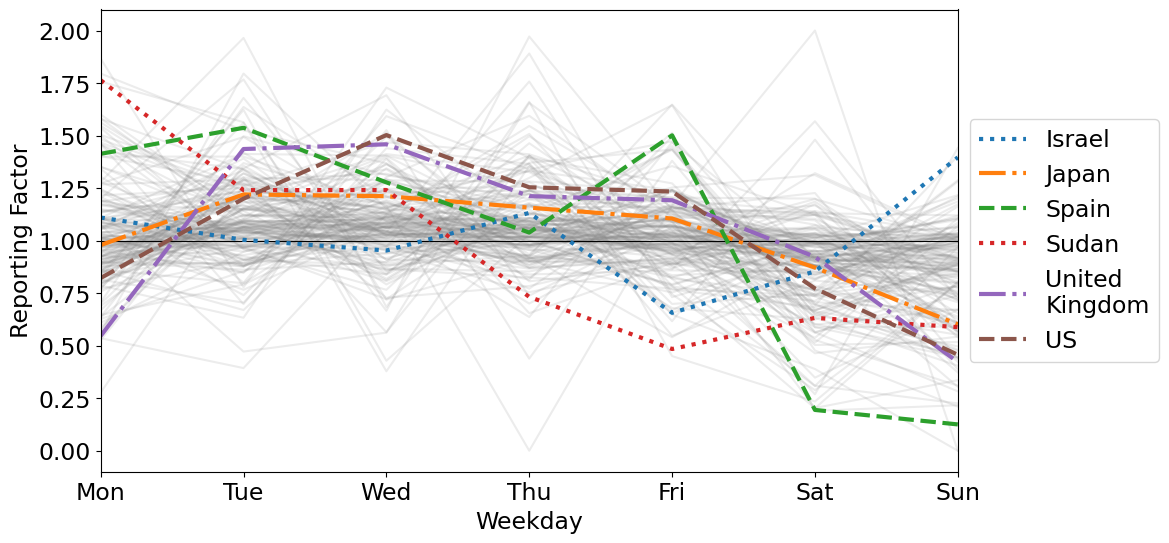

In [7]:
named_countries = [ 'Israel', 'Japan', 'Spain', 'Sudan', 'UnitedKingdom', 'US']
linestyles = [':', '-.', '--']

fig, ax = plt.subplots(1, figsize=(12, 6))

for _, row in deaths_df.iterrows():
    if max(row[1:] > 2):  # Option to exlcude countries with extreme trends 
        print(f"{row[0]} excluded with trend {['%.2f' % x for x in row[1:].values]}")
        continue
    if row[0] in named_countries:
        j = named_countries.index(row[0])
        name = label = re.sub(r'((?<=[a-z])[A-Z]|(?<!\A)[A-Z](?=[a-z]))', r' \n\1', row[0])
        plt.plot(range(7), row.values[1:], label = name, linewidth=3, zorder=2, linestyle=linestyles[j%3])
    else:
        plt.plot(range(7), row.values[1:], linewidth=1.5, alpha=0.15, color='gray', zorder=0)

ax.hlines(1, 0, 6, linestyle = '-', linewidth = 0.8, color='k', zorder = 1)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);
plt.xlim(0, 6); plt.xlabel('Weekday'); plt.ylabel("Reporting Factor")

box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(''); plt.tight_layout()
# plt.savefig(f"../images/data_trends/global_deaths_trends.pdf")

Benin excluded with trend ['0.91', '0.89', '2.88', '0.72', '0.66', '0.27', '0.36']
Bhutan excluded with trend ['0.00', '0.60', '0.00', '2.17', '2.47', '0.99', '0.81']
BosniaandHerzegovina excluded with trend ['2.01', '1.46', '1.03', '0.96', '1.04', '0.26', '0.25']
Botswana excluded with trend ['3.22', '0.82', '0.16', '2.42', '0.14', '0.00', '0.13']
BurkinaFaso excluded with trend ['0.75', '2.45', '1.54', '0.80', '0.51', '0.46', '0.40']
Burundi excluded with trend ['2.29', '0.00', '1.00', '0.00', '1.00', '1.00', '2.00']
DiamondPrincess excluded with trend ['0.00', '2.33', '2.33', '0.00', '1.75', '0.00', '0.00']
Gabon excluded with trend ['2.23', '0.33', '1.31', '0.55', '1.56', '0.71', '0.00']
Iceland excluded with trend ['0.98', '2.43', '0.94', '1.10', '1.14', '0.07', '0.28']
Ireland excluded with trend ['0.36', '0.93', '3.25', '0.87', '0.70', '0.62', '0.26']
Kazakhstan excluded with trend ['1.29', '0.56', '0.54', '0.47', '0.51', '0.21', '3.39']
Kiribati excluded with trend ['1.75', '2.

C:\Users\galla\AppData\Local\Temp\ipykernel_4304\1054016462.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);


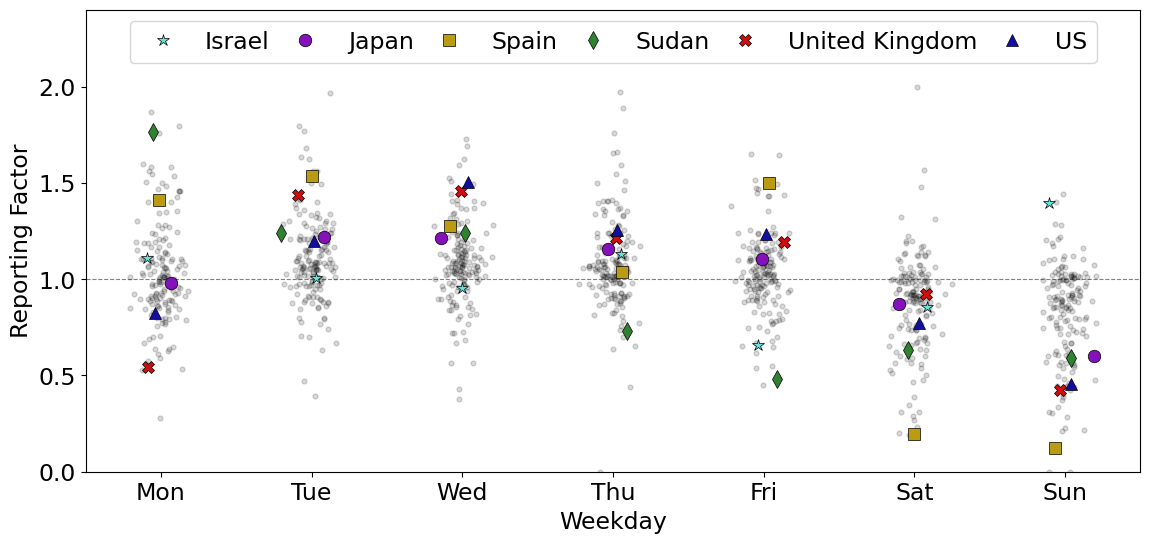

In [8]:
named_countries = [ 'Israel', 'Japan', 'Spain', 'Sudan', 'UnitedKingdom', 'US']
markers = ['*', 'o', 's', 'd', 'X', '^']
colors = ['#68e3db', '#8511ba', '#ba9b11', '#308230', '#d10d0d', '#120da3']
plt.rcParams['font.size'] = '17'
np.random.seed(39)

fig, ax = plt.subplots(1, figsize=(12, 6))

for _, row in deaths_df.iterrows():
    if max(row[1:] > 2) or min(row[1:] == 0):  # Option to exlcude countries with extreme trends 
        print(f"{row[0]} excluded with trend {['%.2f' % x for x in row[1:].values]}")
        continue
    x_vals = [x + np.random.normal(scale=0.075) for x in range(7)]
    if row[0] in named_countries:
        j = named_countries.index(row[0])
        name = label = re.sub(r'((?<=[a-z])[A-Z]|(?<!\A)[A-Z](?=[a-z]))', r' \1', row[0])
        plt.plot(x_vals, row.values[1:], label = name, linewidth=3, zorder=2, linestyle='',
                 color = colors[j%len(colors)], marker = markers[j%len(markers)], markersize = 9, markeredgewidth=0.5, markeredgecolor='k')
    else:
        plt.plot(x_vals, row.values[1:], linewidth=1.5, alpha=0.15, color='k', zorder=1, linestyle='', marker = '.', markersize=7)

ax.hlines(1, -0.5, 6.5, linestyle = '--', linewidth = 0.8, color='gray', zorder = 0)
ax.set_xticklabels(['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);
plt.xlim(-0.5, 6.5); plt.ylim(0, 2.4); plt.ylabel("Reporting Factor"); plt.xlabel('Weekday');

box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc=9, ncol=6, columnspacing = 0.5) #, bbox_to_anchor=(1, 0.5))

plt.suptitle(''); plt.tight_layout()
plt.savefig(f"../images/data_trends/global_deaths_trends.pdf")

4 negative values in death record
7 negative values in cases record
2 negative values in death record
1 negative values in cases record


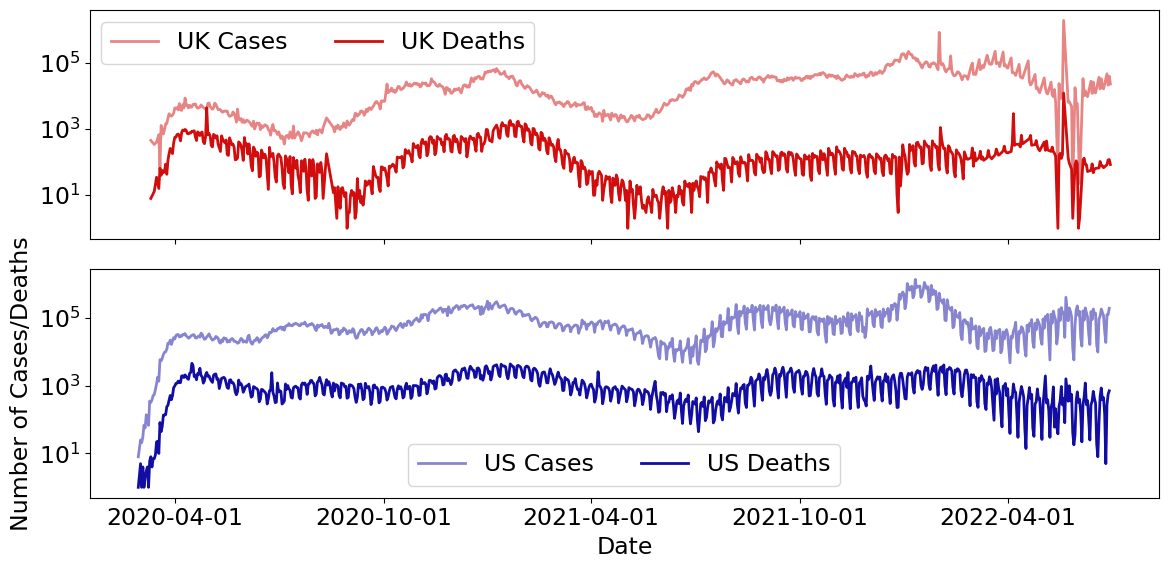

In [9]:
country_subset = ['UnitedKingdom', 'US']; country_subset_named = ['UK', 'US']
plt.rcParams['font.size'] = '17'
fig, ax = plt.subplots(len(country_subset), figsize=(12, 6), sharex=True)

for n, name in enumerate(country_subset):
    index = named_countries.index(name)

    named_df = pd.read_csv(os.path.join(output_dir, f"{name}.csv"))
    named_df['Date'] = pd.to_datetime(named_df['Date'])
    named_df = named_df.sort_values('Date')

    named_df["Daily_Deaths"] = named_df["Deaths"].diff()
    named_df["Daily_Cases"] = named_df["Confirmed"].diff()

    print(str((named_df["Daily_Deaths"] < 0).sum()) + " negative values in death record")
    print(str((named_df["Daily_Cases"] < 0).sum()) + " negative values in cases record")

    named_df = named_df[named_df["Daily_Deaths"] > 0]
    named_df = named_df[named_df["Daily_Cases"] > 0]

    # named_df[["Daily_Deaths","Daily_Cases"]] = named_df[["Daily_Deaths","Daily_Cases"]].clip(lower = 1)
    label_name = country_subset_named[n]
    ax[n].plot(named_df['Date'], named_df['Daily_Cases'], label = label_name + ' Cases', linewidth=2, color=colors[index], alpha=0.5)
    ax[n].plot(named_df['Date'], named_df['Daily_Deaths'], label = label_name + ' Deaths', linewidth=2, color=colors[index], alpha=1)
    ax[n].set_yscale('log'); ax[n].legend(ncol=2)

ax[n].set_xticks(ax[n].get_xticks()[::2])
plt.yscale('log'); plt.ylabel('Number of Cases/Deaths'); plt.xlabel('Date')
plt.tight_layout()  

plt.savefig("../images/data_trends/selected_cases_deaths.pdf")


In [10]:
from analysis import rel_reporting_calc, plot_fft, fourier_transform

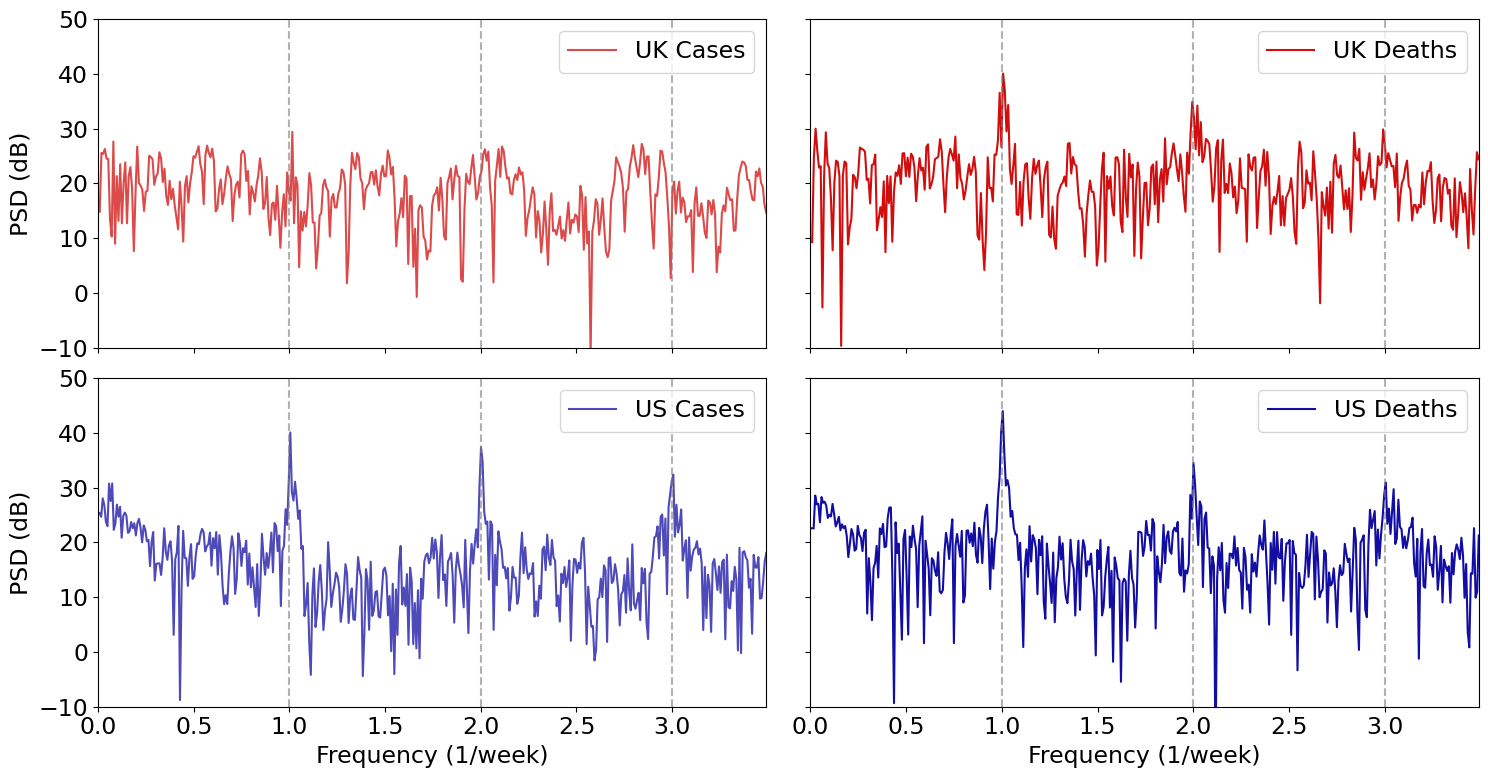

In [103]:
country_subset = ['UnitedKingdom', 'US']; country_subset_named = ['UK', 'US']
plt.rcParams['font.size'] = '17'
fig, axs = plt.subplots(nrows=len(country_subset), ncols=2, 
                        figsize=(15, 8), sharex=True, sharey=True)

for n, name in enumerate(country_subset):
    index = named_countries.index(name)

    named_df = pd.read_csv(os.path.join(output_dir, f"{name}.csv"))
    named_df['Date'] = pd.to_datetime(named_df['Date'])
    named_df = named_df.sort_values('Date')

    named_df["Daily_Deaths"] = named_df["Deaths"].diff()
    named_df["Daily_Cases"] = named_df["Confirmed"].diff()

    named_df = named_df[named_df["Daily_Deaths"] > 0]
    named_df = named_df[named_df["Daily_Cases"] > 0]

    df = rel_reporting_calc(named_df, ['Daily_Cases', 'Daily_Deaths'])

    case_fft, case_freq = fourier_transform(df, column='Dif_Daily_Cases', compute_psd=True)
    plot_fft(case_fft, case_freq, ax=axs[n][0], color=colors[index], alpha=0.75, ylim=(-10, 50),
             label=country_subset_named[n] + " Cases")

    death_fft, death_freq = fourier_transform(df, column='Dif_Daily_Deaths', compute_psd=True)
    plot_fft(death_fft, death_freq, ax=axs[n][1], color=colors[index], alpha=1, ylim=(-10, 50),
             label= country_subset_named[n] + " Deaths")
    axs[n][0].legend(loc=1); axs[n][1].legend(loc=1)

# ax[n].set_xticks(ax[n].get_xticks()[::2])
# plt.yscale('log'); plt.ylabel('Number of Cases/Deaths'); plt.xlabel('Date')
for i in range(2):
    axs[0][i].set_xlabel('')
    axs[i][1].set_ylabel('')

plt.tight_layout()  
plt.savefig("../images/data_trends/selected_fourier_spectra.pdf")

In [53]:
named_df = pd.read_csv(os.path.join(output_dir, "UnitedKingdom.csv"))
named_df['Date'] = pd.to_datetime(named_df['Date'])
named_df = named_df.sort_values('Date')

named_df["Daily_Deaths"] = named_df["Deaths"].diff()
named_df["Daily_Cases"] = named_df["Confirmed"].diff()

df = named_df[(named_df["Daily_Deaths"] > 0) & (named_df["Daily_Cases"] > 0)].copy()

df = rel_reporting_calc(df, ['Daily_Cases', 'Daily_Deaths'])

In [54]:
print(df.head())
df = df.dropna(axis=1, how='all')
df['Days'] = (df['Date'] - df['Date'].min()).dt.days
df['Day_Index'] = df['Date'].dt.dayofweek
print(df.head())

     Unnamed: 0 Province_State Country_Region Last_Update  Lat  Long_  \
187           0            NaN            NaN         NaN  NaN    NaN   
196           0            NaN            NaN         NaN  NaN    NaN   
202           0            NaN            NaN         NaN  NaN    NaN   
208           0            NaN            NaN         NaN  NaN    NaN   
211           0            NaN            NaN         NaN  NaN    NaN   

     Confirmed  Deaths  Recovered  Active  ...  Country/Region  \
187      457.0     8.0       19.0     NaN  ...  United Kingdom   
196     1141.0    21.0       19.0     NaN  ...  United Kingdom   
202     1545.0    56.0       21.0     NaN  ...  United Kingdom   
208     2636.0    72.0       67.0     NaN  ...  United Kingdom   
211     2705.0   138.0       67.0     NaN  ...  United Kingdom   

             Last Update   Latitude  Longitude Daily_Deaths Daily_Cases  \
187  2020-03-11T21:33:03  47.910639  -3.175858          8.0       457.0   
196  2020-03-1

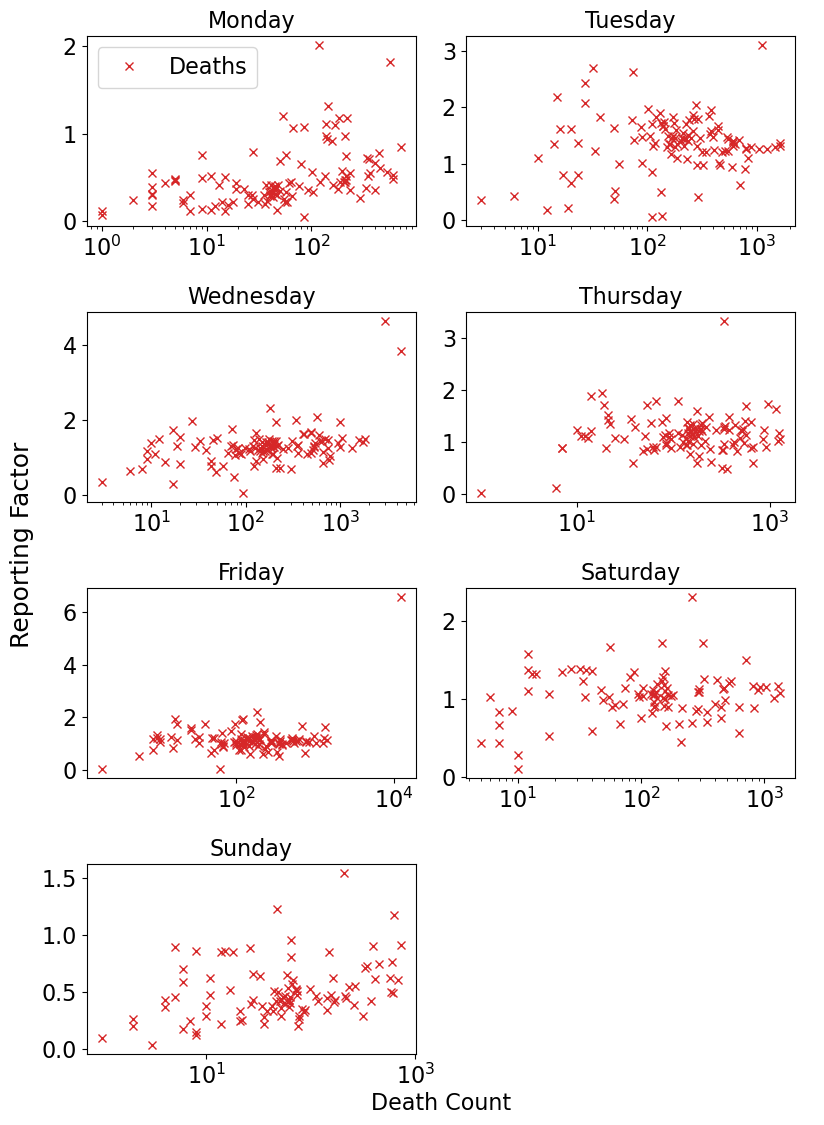

In [102]:
day_indices = range(7)  # Only considering range Sat - Tues for visual simplicity
# period_df = df[df['Date'] < '2022-02-21']  # Reporting changes on Feb 21st 2022

fig, axs = plt.subplots(4,2, figsize=(9,12))
font_size = 16

df = df[df['Daily_Cases'] >= 50]

for i, day in enumerate(day_indices):
    day_df = df[df['Day_Index'] == day]
    ax = axs.reshape(-1)[i]
    ax.plot(day_df['Daily_Deaths'], day_df['Dif_Daily_Deaths'], color='tab:red',
            marker = 'x', linestyle = '', label = 'Deaths')
#     ax.plot(day_df['Daily_Cases'], day_df['Dif_Daily_Cases'], color='tab:blue',
#             marker = '+', linestyle = '', label = 'Cases')
    ax.set_title(day_df['Weekday'].iloc[0], fontsize=font_size)
    ax.tick_params(axis='both', which='major', labelsize=font_size)
    ax.set_xscale('log')

ax2 = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Reporting Factor", fontsize=18); plt.xlabel('Death Count', fontsize=font_size)

axs[0,0].legend(loc=2, fontsize=font_size)
if len(day_indices) % 2 != 0:
        fig.delaxes(axs[-1, -1])
plt.tight_layout()
plt.savefig(f"../images/data_trends/reporting_trends_deaths_UK.pdf")

In [96]:
data_type = 'Deaths'

def print_lr(result):
    """Improved readability of linear regression results"""
    print(f"{day_df['Weekday'].iloc[0]}: Best fit slope: {result.slope:.3g} +/- " +
          f"+ {result.stderr:.3g}; R^2 = {result.rvalue:.2f}")

for i, day in enumerate(day_indices):
    day_df = df[df['Day_Index'] == day]
    day_df = day_df.sample(frac=1).reset_index(drop=True)
    day_df = day_df.dropna(subset=['Daily_' + data_type, 'Dif_Daily_' + data_type])

    result = sp.stats.linregress(day_df['Daily_' + data_type][1:], day_df['Dif_Daily_' + data_type][1:])
    print_lr(result)

Monday: Best fit slope: 0.000851 +/- + 0.000195; R^2 = 0.38
Tuesday: Best fit slope: 5.45e-05 +/- + 0.000143; R^2 = 0.04
Wednesday: Best fit slope: 0.000603 +/- + 6.55e-05; R^2 = 0.65
Thursday: Best fit slope: 5.54e-05 +/- + 0.000125; R^2 = 0.04
Friday: Best fit slope: 0.000426 +/- + 2.85e-05; R^2 = 0.82
Saturday: Best fit slope: 7.41e-05 +/- + 0.000114; R^2 = 0.07
Sunday: Best fit slope: 0.00049 +/- + 0.000137; R^2 = 0.34
